In [104]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn  import metrics

import time

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
col = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names')

In [3]:
col['back'] = col['back'].str.replace(': continuous.', '')
col['back'] = col['back'].str.replace(': symbolic.', '')
col_names = col['back'].to_list()
col_names.append('target')
col_names

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [4]:
df = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz', names=col_names)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [6]:
df['target'] = df['target'].str.replace('.','')

<AxesSubplot:>

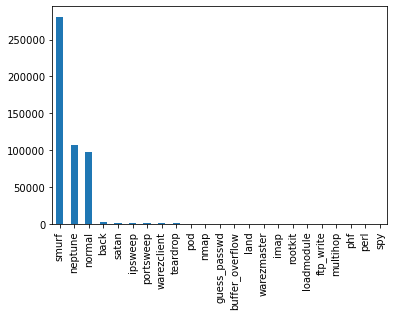

In [7]:
df['target'].value_counts().plot(kind='bar')

In [8]:
attack_type = pd.read_csv('http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types', names=None, header=None)
attack_type[0] = attack_type[0].str.replace(' ',':')
attack_type_list = attack_type[0].to_list()
attack_type_list.append('normal:normal')
attack_type_list

['back:dos',
 'buffer_overflow:u2r',
 'ftp_write:r2l',
 'guess_passwd:r2l',
 'imap:r2l',
 'ipsweep:probe',
 'land:dos',
 'loadmodule:u2r',
 'multihop:r2l',
 'neptune:dos',
 'nmap:probe',
 'perl:u2r',
 'phf:r2l',
 'pod:dos',
 'portsweep:probe',
 'rootkit:u2r',
 'satan:probe',
 'smurf:dos',
 'spy:r2l',
 'teardrop:dos',
 'warezclient:r2l',
 'warezmaster:r2l',
 'normal:normal']

In [9]:
attack_type_dict = {
    'back':'dos',
 'buffer_overflow':'u2r',
 'ftp_write':'r2l',
 'guess_passwd':'r2l',
 'imap':'r2l',
 'ipsweep':'probe',
 'land':'dos',
 'loadmodule':'u2r',
 'multihop':'r2l',
 'neptune':'dos',
 'nmap':'probe',
 'perl':'u2r',
 'phf':'r2l',
 'pod':'dos',
 'portsweep':'probe',
 'rootkit':'u2r',
 'satan':'probe',
 'smurf':'dos',
 'spy':'r2l',
 'teardrop':'dos',
 'warezclient':'r2l',
 'warezmaster':'r2l',
 'normal':'normal'
}

In [10]:
df['attack_type'] = df['target'].apply(lambda x: attack_type_dict[x])

In [11]:
categorical_features = df.select_dtypes('object').columns.to_list()
print('Categorical Features: ', categorical_features)

Categorical Features:  ['protocol_type', 'service', 'flag', 'target', 'attack_type']


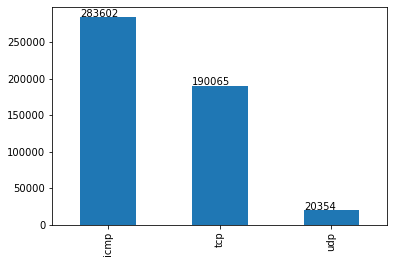

In [14]:
ax = df['protocol_type'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

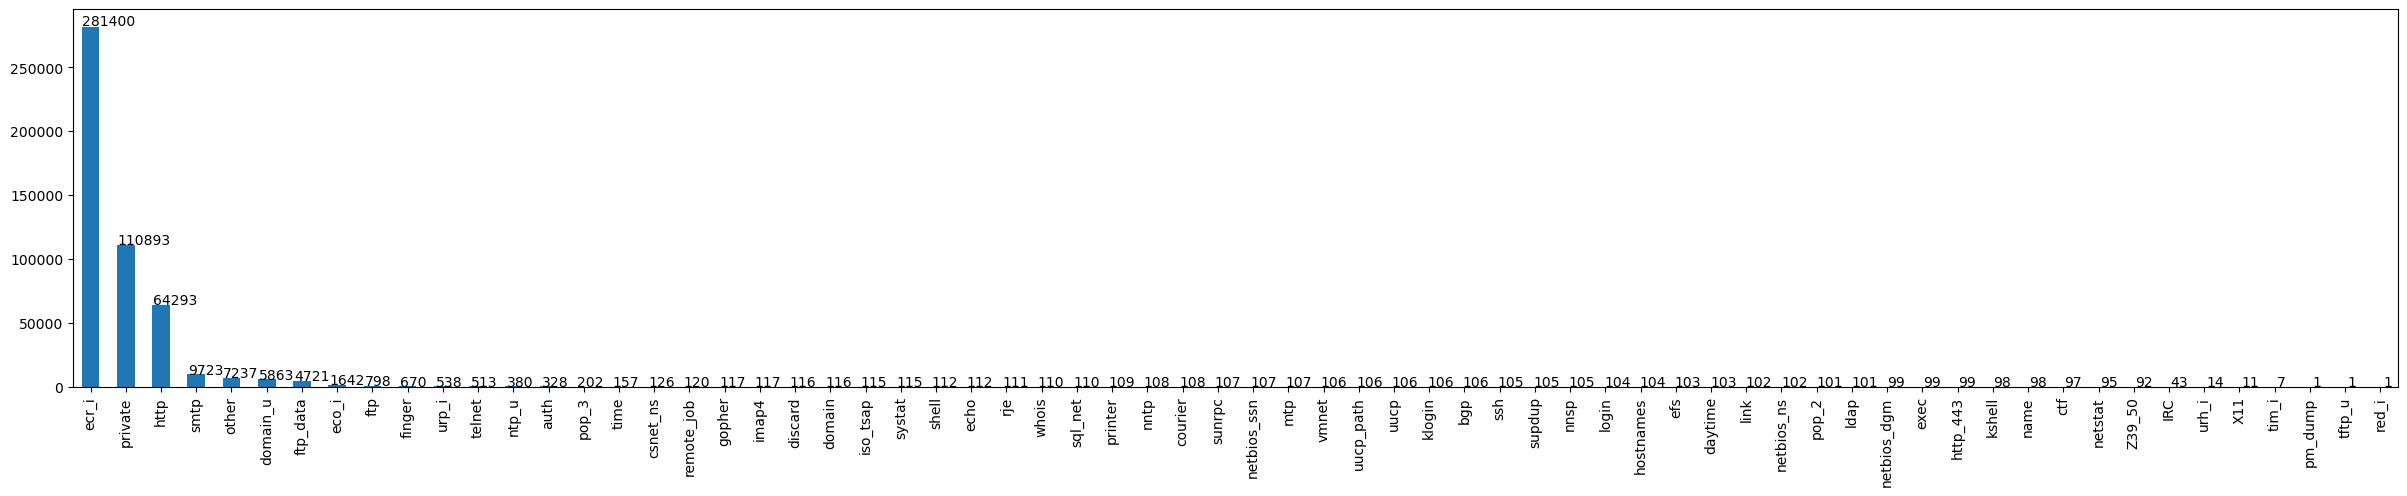

In [19]:
plt.figure(figsize=(30,5), dpi=100)
ax = df['service'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

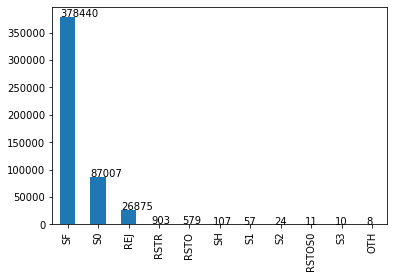

In [20]:
ax = df['flag'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

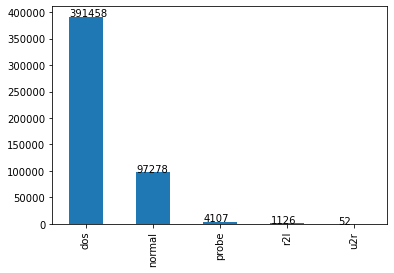

In [24]:

ax = df['attack_type'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

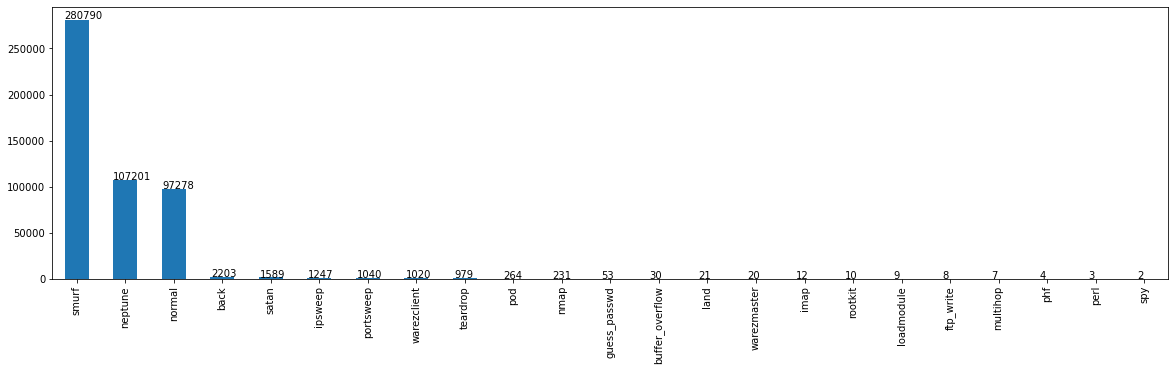

In [25]:
plt.figure(figsize=(20,5))
ax = df['target'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [34]:
df = df[[col for col in df if df[col].nunique() > 1]]

<AxesSubplot:>

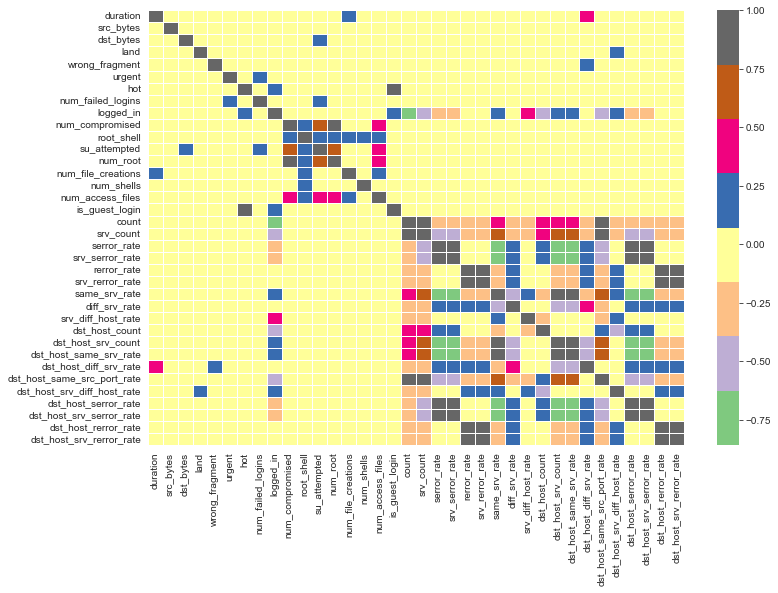

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='Accent', linewidths=1, linecolor='w')

In [40]:
df['dst_host_rerror_rate'].corr(df['dst_host_srv_rerror_rate'])

0.9848038371110298

In [56]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308375

In [57]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956001

In [58]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845669

In [59]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751249

In [73]:
df['rerror_rate'].corr(df['srv_rerror_rate'])

0.9947309539817937

In [60]:
df['dst_host_serror_rate'].corr(df['dst_host_srv_serror_rate'])

0.9981559173373309

In [61]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373975

In [62]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680105015

In [63]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850098

In [64]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485680104

In [72]:
df['serror_rate'].corr(df['srv_serror_rate'])

0.9983615072725953

In [65]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783333

In [66]:
df['dst_host_same_src_port_rate'].corr(df['count'])

0.8605787404023126

In [67]:
df['same_srv_rate'].corr(df['dst_host_srv_count'])

0.898954663032421

In [71]:
df['count'].corr(df['srv_count'])

0.9436670688882656

In [68]:
df['same_srv_rate'].corr(df['dst_host_same_srv_rate'])

0.9278080342691243

In [69]:
df['num_compromised'].corr(df['num_root'])

0.9938277978738367

In [70]:
df['hot'].corr(df['is_guest_login'])

0.8435715365802817

In [74]:
df.drop([
    'is_guest_login',
    'num_root',
    'dst_host_same_src_port_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'rerror_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'srv_serror_rate',
    'srv_count'
], axis=1, inplace=True)

In [92]:
df.drop('target', axis=1, inplace=True)

In [96]:
cat_features = df.select_dtypes('object').columns.to_list()
le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,attack_type
0,0,1,22,9,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.0,1


In [106]:
from sklearn.preprocessing import MinMaxScaler

t = df
    
X= t.drop('attack_type', axis=1)
y= t['attack_type']

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=21)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((345814, 29), (148207, 29), (345814,), (148207,))

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xg = XGBClassifier(learning_rate=0.5, eval_metric='rmse')
lgbm = LGBMClassifier()

algos = [lr, rf, xg, lgbm]

names = ['Linear Classifier', 'Random Forest Classifier', 'XGBRegressor', 'LightGBM']

rmse_list = []

for name in algos:
    model = name
    s_time = time.time()
    model.fit(X_train,y_train)
    e_time = time.time()
    train_s_time = time.time()
    yt_pred = model.predict(X_train)
    train_e_time = time.time()
    test_s_time = time.time()
    y_pred = model.predict(X_valid)
    test_e_time = time.time()
    rt2= metrics.r2_score(y_train,yt_pred)
    r2= metrics.r2_score(y_valid,y_pred)

    print(f'{model}=> Training: {round(rt2, 4)},  Testing: {round(r2, 4)}, Training Time: {round(e_time-s_time, 4)}, Train Data Predict Time: {round(train_e_time-train_s_time, 4)}, Test Data Predict Time: {round(test_e_time-test_s_time, 4)}')

LogisticRegression()=> Training: 0.9176,  Testing: 0.9096, Training Time: 31.7626, Train Data Predict Time: 0.0684, Test Data Predict Time: 0.5061
RandomForestClassifier()=> Training: 0.9999,  Testing: 0.995, Training Time: 64.5507, Train Data Predict Time: 6.22, Test Data Predict Time: 2.5755
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)=> Training